Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [32]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Univariate Analysis

In [33]:
data_req = data[["CreditScore","Age","Gender","Tenure","Balance","NumOfProducts","HasCrCard","EstimatedSalary","Exited"]]

In [34]:
data_req.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,199992.480000,1.000000


In [35]:
corr = data_req.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.009933,-0.007138
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,0.012097,1.000000


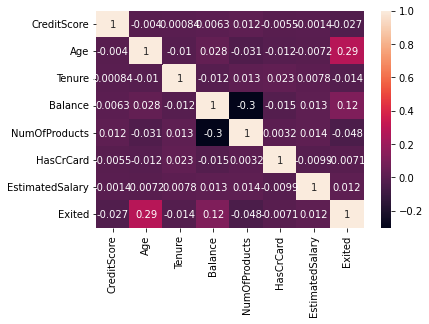

In [36]:
sns.heatmap(corr, annot=True)
plt.show()

In [37]:
data_req.head()

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,42,Female,2,0.00,1,1,101348.88,1
1,608,41,Female,1,83807.86,1,0,112542.58,0
2,502,42,Female,8,159660.80,3,1,113931.57,1
3,699,39,Female,1,0.00,2,0,93826.63,0
4,850,43,Female,2,125510.82,1,1,79084.10,0


Calculating missing values

In [38]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Finding outliers

In [39]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [40]:
outliers = find_outliers_IQR(data_req["Age"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 359
max outlier value: 92
min outlier value: 63


58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64

In [41]:
data_req.head()

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,42,Female,2,0.00,1,1,101348.88,1
1,608,41,Female,1,83807.86,1,0,112542.58,0
2,502,42,Female,8,159660.80,3,1,113931.57,1
3,699,39,Female,1,0.00,2,0,93826.63,0
4,850,43,Female,2,125510.82,1,1,79084.10,0


In [42]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Gender           10000 non-null  object 
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 703.2+ KB


In [43]:
gender = pd.get_dummies(data_req["Gender"],prefix_sep="_",prefix="gender",drop_first = True)

In [44]:
gender.head()

,gender_Male
0,0
1,0
2,0
3,0
4,0


In [45]:
data_req.drop("Gender",axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
data_req.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,101348.88,1
1,608,41,1,83807.86,1,0,112542.58,0
2,502,42,8,159660.80,3,1,113931.57,1
3,699,39,1,0.00,2,0,93826.63,0
4,850,43,2,125510.82,1,1,79084.10,0


In [47]:
data_req_concat = pd.concat([data_req,gender],axis = 1,join = 'inner')

In [48]:
data_req_concat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,gender_Male
0,619,42,2,0.00,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,112542.58,0,0
2,502,42,8,159660.80,3,1,113931.57,1,0
3,699,39,1,0.00,2,0,93826.63,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0


In [56]:
X = data_req_concat[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','EstimatedSalary','gender_Male']]
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,gender_Male
0,619,42,2,0.00,1,1,101348.88,0
1,608,41,1,83807.86,1,0,112542.58,0
2,502,42,8,159660.80,3,1,113931.57,0
3,699,39,1,0.00,2,0,93826.63,0
4,850,43,2,125510.82,1,1,79084.10,0


In [58]:
y = data_req_concat[['Exited']]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
data_scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [67]:
data_scaled_X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,0.506735,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,0.562709,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.569654,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0


In [53]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(data_scaled_X,y,train_size = 0.80)

In [69]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,gender_Male
1512,0.612,0.283784,1.0,0.000000,0.333333,1.0,0.494463,1.0
487,0.384,0.283784,0.3,0.538453,0.000000,1.0,0.071716,1.0
9265,0.650,0.270270,0.1,0.414578,0.000000,0.0,0.110297,0.0
4594,0.600,0.175676,0.1,0.639965,0.333333,0.0,0.135324,0.0
3595,0.744,0.189189,0.5,0.425701,0.000000,1.0,0.384972,0.0


In [70]:
y_train.head()

,Exited
1512,0
487,1
9265,1
4594,0
3595,0
